## Using the distance matricies I created in the distance API notebook to run MDS

This one is for Congressional District 6, using 0.05 degree intervals for the grid.

In [2]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from decimal import Decimal

#queue up the distance matrix from the distance API notebook.
dmatrix = pd.read_pickle('Shapes/06/CD06_05dmx.pkl')
dmatrix2 = dmatrix.astype(float)

#create a list of points from the df header to set color ramp on plot by latitude only
geopoints = list(dmatrix)

#split the tuple list of points into lists of lat and long
lat = []
long = []
for point in geopoints:
    long.append(point[0])
    lat.append(point[1])
    
#replace any remaining NaN values 
dmatrix2.fillna(0, inplace = True) 

#test to make sure the dissimilarity matrix is symmetrical.
dmatrix.equals(dmatrix.T)

True

In [3]:
from sklearn import manifold
import numpy as np
from sklearn.metrics import pairwise_distances



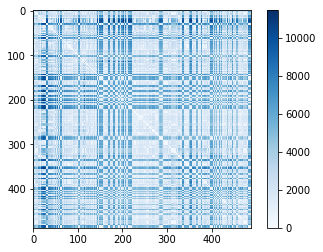

In [4]:
#visualizing the time travel matrix array—not terribly meaningful, but identifies gaps in dataset
plt.imshow(dmatrix2, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

plt.savefig('Shapes/06/District6_05DissimilarityMatrix.png')

In [4]:
ttm = dmatrix2 #make a copy so I don't accidentally break stuff.

#run the MDS modeling on the original ttm (time travel matrix)
model = manifold.MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(ttm)


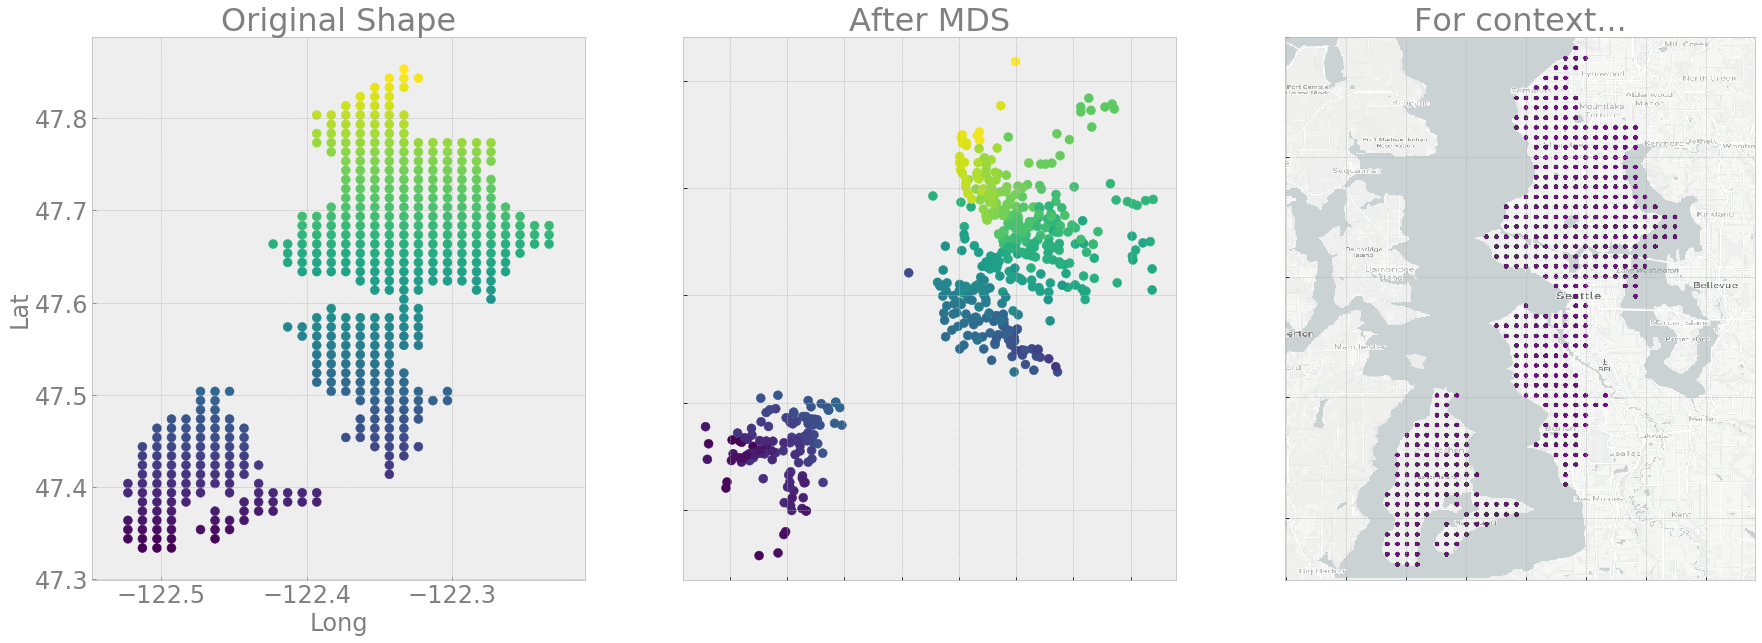

In [6]:
#lets compare the MDS results to our original
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.style.use(['bmh'])

ax1.scatter(lat,long, s = 80, c =long, cmap=plt.cm.viridis)
ax1.set_title('Original Shape', color='gray', fontsize=32)
ax1.set_ylabel('Lat', color='gray', fontsize=24)
ax1.set_xlabel('Long', color='gray', fontsize=24)
ax1.tick_params(colors='gray', labelsize=24)

ax2.scatter(out[:, 0], -out[:, 1],s = 80, c =long, cmap=plt.cm.viridis)   
ax2.set_title('After MDS', color='gray', size=32)
ax2.set_yticklabels([])
ax2.set_xticklabels([])

img = plt.imread('Shapes/06/CD06_05.png')
ax3.imshow(img)
ax3.set_title('For context...', color='gray', size=32)
ax3.set_yticklabels([])
ax3.set_xticklabels([])

plt.savefig('Shapes/06/District6_MDS.png')
